# FINDER on synthetic datasets
-------------------------------------

In the short notebook we will see how to generate a synthetic dataset, based on true recordings of DNA origami.
The `Geometry` package allows us to arrange this sample in different shapes and control the amount of noise.


## Generating synthetic data

Our dataset will be based on true recordings, so first we need to access them.
We have four different options, all stored in the `./data_sources` directory.


In [1]:
import os

data_folder = os.path.join(os.getcwd(),"data_sources")

clusters_library = {
    "1mers": "Clusters_DNA_1mers",
    "3mers": "Clusters_DNA_3mers",
    "4mers": "Clusters_DNA_4mers",
    "neuron": "Clusters_Neuron"
}

We have three classes in the `Geometry` module.

* `Geometry_Free` arranges the samples freely and randomly;
* `Geometry_Grid` arranges the samples in a grid;
* `Geometry_Path` arranges the sample in a sinusoidal shape;

let's import them!

In [2]:
from Geometry import Geometry_Path, Geometry_Grid, Geometry_Free

Let's see the various possibilities we have.


### Arranging 1-mers randomly

In [3]:
G = Geometry_Free(basefolder=data_folder, # the folder in which the data is stored
                  unitCluster_Library=clusters_library["1mers"] #the cluster library we are using
                  , noise_ratio=0.1  # add 1 noise point for every 10 real points
                  )
G.GeneratePoints(seed=42)

Loaded 29 template clusters..
Loaded 29 template clusters..


We can use the `plotScatter` function to plot the result.

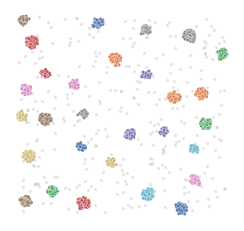

In [4]:
G.plotScatter()

### Arranging 3-mers on a grid

Loaded 25 template clusters..
Loaded 25 template clusters..


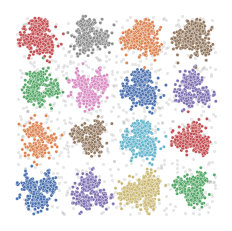

In [5]:
G = Geometry_Grid(data_folder, unitCluster_Library=clusters_library['3mers'],
                  noise_ratio=0.1, # add 1 noise point for every 10 real points
                  n_side=4 # make a 4x4 grid
                  )
G.GeneratePoints(seed=42)
G.plotScatter()

### Arranging 4-mers on a sinusoidal shape


Loaded 44 template clusters..
Loaded 44 template clusters..


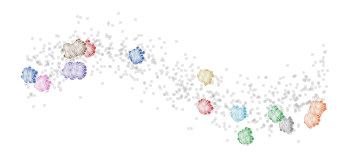

In [6]:
G = Geometry_Path(data_folder, unitCluster_Library=clusters_library['4mers'])
G.GeneratePoints(seed=42,
                 N_clusters=16, #number of clusters we want to generate
                 N_Noise= 16*50) #generate 50 moise points for each cluster
G.plotScatter()

# Using FINDER
-----------------------------------------

Now we will use `FINDER` to label our data.
First let us generate them, using `Geometry` as we saw above:

In [7]:
cluster_type = "3mers"
geometry_type = "grid"

seed = 42

if geometry_type == "free":
    G = Geometry_Free(data_folder, unitCluster_Library=clusters_library[cluster_type], noise_ratio=0.1)
    G.GeneratePoints(seed=seed)

elif geometry_type == "path":
    G = Geometry_Path(data_folder, unitCluster_Library=clusters_library[cluster_type])
    G.GeneratePoints(seed=seed,N_clusters=16, N_Noise= 16*20)

elif geometry_type == "grid":
    G = Geometry_Grid(data_folder, unitCluster_Library=clusters_library[cluster_type], noise_ratio=0.1, n_side=5)
    G.GeneratePoints(seed=seed)

Loaded 25 template clusters..
Loaded 25 template clusters..


Note that we can easily access the points:

In [8]:
X = G.XC
X

array([[ 20.84912486,  29.47229514],
       [ 23.01372486, -39.65270486],
       [-33.58187514, -49.49610486],
       ...,
       [430.61130117, 610.1532247 ],
       [389.78721799, -82.13812194],
       [227.97063787, 200.14864316]])

or the labels

In [9]:
labels_true = G.labels_groundtruth

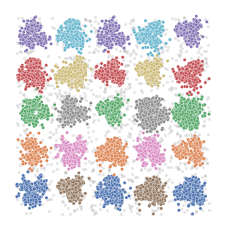

In [10]:
G.plotScatter()

### FINDER

In order to use `FINDER` we need to import it first.
Since it uses the `sklearn` API, we simply first define the model with the various parameters.

In [11]:
from Finder import Finder

model = Finder(similarity_score_computation="threshold")

and then we call the function `fit()` to fit our data.

In [12]:
labels_finder = model.fit(X)

Analysing 13048 points
Boundaries for sigma    : 3.287918879778114 , 15.547338754674056
Sigmas are:
[ 3.28791888  3.67380794  4.10498717  4.58677206  5.125102    5.72661344
  6.39872172  7.14971249  7.98884385  8.92646049  9.97412122 11.14474143
 12.45275236 13.91427898 15.54733875]
Thresholds are:
[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Progress: |██████████████████████████████████████████████████| 100.0% Complete Complete
Computing clusters : 100.79 seconds
Postprocessing..
Progress: |██████████████████████████████████████████████████| 100.0% Complete0.0% Complete
Computing similarity scores: 36.31 seconds
Selected threshold , sigma : 9 , 7.988843849182642
Comp time Step 1 (set boundaries): 0.06 seconds
Comp time Step 2 (clustering): 100.79 seconds
Comp time Step 3 (postprocessing): 37.93 seconds
Selected parameters: {'sigma': 7.988843849182642, 'threshold': 9}


The parameters selected by the algorithm can be easily accessed

In [13]:
model.selected_parameters

{'sigma': 7.988843849182642, 'threshold': 9}

Let's see how it performs

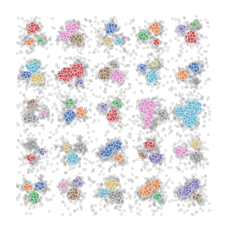

In [14]:
G.plotScatter(labels_finder)

Notice how `FINDER` is able to identify some _sub-clusters_ that constitutes our dataset:
since we used "3-mers", we expect a clustering algorithm to identify 3 clusters for each DNA-origami, and `FINDER` manages to identify most of them.


All the configurations of parameters that `FINDER` tried (we call it the `phasespace`) are still stored and accessible as a `pd.DataFrame`

In [15]:
model.phasespace

,sigma,threshold,labels,time,no_clusters,similarityScore
0,3.287919,5,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...",0.168808,129,202.0
1,3.287919,6,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...",0.144796,71,110.0
2,3.287919,7,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...",0.145963,33,75.0
3,3.287919,8,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...",0.143055,18,56.0
4,3.287919,9,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...",0.103406,10,36.0
...,...,...,...,...,...,...
235,15.547339,16,"[0, -1, -1, -1, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0...",0.554529,26,77.0
236,15.547339,17,"[0, -1, -1, -1, -1, 0, -1, 0, 0, -1, 0, 0, 0, ...",0.694027,26,75.0
237,15.547339,18,"[0, -1, -1, -1, -1, 0, -1, 0, 0, -1, 0, 0, 0, ...",0.991977,28,72.0
238,15.547339,19,"[0, -1, -1, -1, -1, 0, -1, 0, 0, -1, 0, 0, 0, ...",0.684360,31,74.0


We can plot the `Similarity Score` (see the paper) for each configuration.

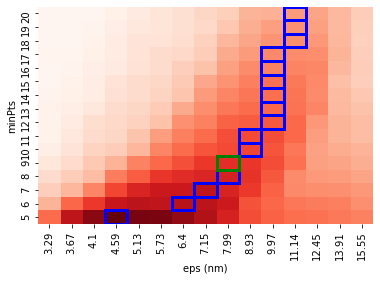

In [16]:
model.plotPhaseSpace()